In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from src.utils import create_firing_field, get_3dA, lattice

In [3]:
step_size = 0.1
env_size  = 2
b = int(env_size/step_size)

X = np.mgrid[0:env_size:step_size, 0:env_size:step_size, 0:env_size:step_size]
X = X.reshape((3,-1)).T
X = X - env_size*0.5


f = np.ones((5, b,b,b))
A = np.zeros((5,2,3))
for i in range(1,5):    

    if i==1:
        Q = np.eye(3)
    else:
        Q = ortho_group.rvs(3)

    A[i-1] = np.dot( get_3dA(s=1.), Q)
    
    g = create_firing_field(X, A[i-1])
    g = g.reshape((b,b,b))
    f[i] = f[i-1]*g

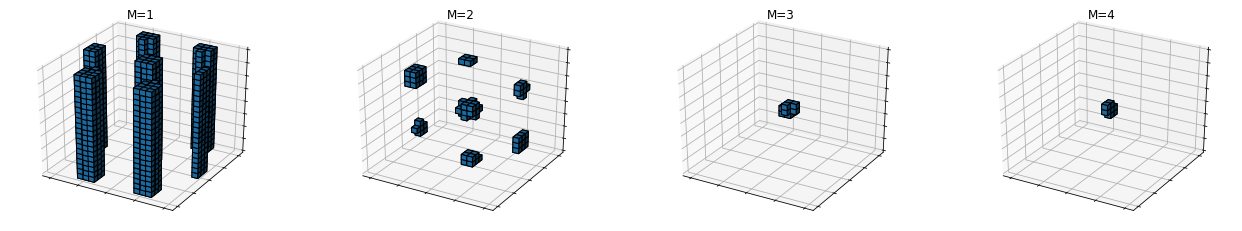

In [4]:
fig = plt.figure(figsize=(22,4))

thresh = 0.7
for i in range(1,5):
    ax = fig.add_subplot(1, 4, i, projection='3d')
    ax.set_title("M={}".format(i))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    g = f[i]
    voxels = g > np.amax(g)*thresh
    ax.voxels(voxels, edgecolor='k')
    
plt.savefig("./Figures/3D_fields_lego.pdf", dpi=300, transparent=False)

In [5]:
from scipy.signal import correlate2d

step_size = 0.02
env_size  = 2
b = int(env_size/step_size)

X = np.mgrid[0:env_size:step_size, 0:env_size:step_size]
X = X.reshape((2,-1)).T
X = X - env_size*0.5


Plane_base = np.array([
    [np.cos(-np.pi/4.),0,np.sin(-np.pi/4.)],
    [0,1,0]
])

X_ = np.dot(X, Plane_base)


i = 1
img = create_firing_field(X_, A[i])
img = img.reshape((b,b))

corr = correlate2d(img,img, mode="full")

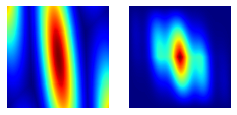

In [6]:


fig = plt.figure(figsize=(4,2))
ax = fig.add_subplot(1,2,1)
ax.axis("off")
ax.imshow(img.T, cmap="jet")

ax = fig.add_subplot(1,2,2)
ax.axis("off")
ax.imshow(corr.T, cmap="jet")

plt.savefig("./Figures/2D_Field_Tilted_Plane.pdf", dpi=300, transparent=False)

In [10]:

step_size = 0.05
env_size  = 4.
b = int(env_size/step_size)

X = np.mgrid[0:env_size:step_size, 0:env_size:step_size]
X = X.reshape((2,-1)).T
X = X - env_size*0.5

angle = np.pi*0.5
rot = 0.0

Plane_base = np.array([
    [np.cos(rot), np.sin(rot), 0],
    [np.cos(angle)*np.cos(rot + np.pi/2.),np.cos(angle)*np.sin(rot + np.pi/2.), np.sin(angle)]
])


PL2 = np.array([
    [1,0, 0],
    [0,1, 0]
])



X_ = np.dot(X, Plane_base)



X_2 = np.dot(X, PL2)

img = create_firing_field(X_, A)
img = img.reshape((b,b))

thresh = 0.7
voxels = g > np.amax(g)*thresh

80
[[ 1.25       -0.72168784  0.        ]
 [ 0.          1.44337567  0.        ]]


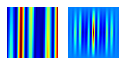

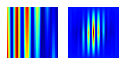

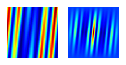

In [17]:
import scipy


def get_3dA(s):
    B = np.zeros((3,3))
    B[:2,:2] = lattice(np.random.sample()*np.pi*2.,np.pi/3.)
    B[:2,2] = np.random.randn(2)*0.05
    B[2,2] = 1 + np.random.randn()*0.1
    A = np.zeros((2,3))
    A = np.linalg.inv(s*B)[:2]
    return A


for _ in range(3):
    A = get_3dA(s=0.8)
    
    img = create_firing_field(X_ + np.random.randn(3), A)
    img2 = create_firing_field(X_2, A)
    img = img.reshape((b,b))
    img2 = img2.reshape((b,b))
    
    f = img
    f2 = img2
    f = f - np.median(f)
    f = f/np.std(f)
    
    f2 = f2 - np.median(f2)
    f2 = f2/np.std(f2)
    
    corr = scipy.signal.correlate2d(f,f, mode="full")

    fig = plt.figure(figsize=(2,1))
    ax = fig.add_subplot(1,2,1)
    ax.axis("off")
    ax.imshow(f.T, cmap="jet")

    ax = fig.add_subplot(1,2,2)
    ax.axis("off")
    ax.imshow(corr.T, cmap="jet")